<a href="https://colab.research.google.com/github/nhabt-uit/CS2225.CH1801.N014/blob/NhaBT/VRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/VRA-CS2225.CH1801.N014

/content/drive/My Drive/VRA-CS2225.CH1801.N014


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content/drive/My Drive/VRA-CS2225.CH1801.N014')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [6]:
data = []
labels = []
classes = 5
cur_path = os.getcwd()

In [7]:
cur_path

'/content/drive/My Drive/VRA-CS2225.CH1801.N014'

## Preprocess the images

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [ ]:
np.save('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/data',data)
np.save('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/target',labels)

## Load data & Labels

In [ ]:
data=np.load('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/data.npy')
labels=np.load('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/target.npy')

In [ ]:
print(data.shape, labels.shape)

(3150, 30, 30, 3) (3150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2520, 30, 30, 3) (630, 30, 30, 3) (2520,) (630,)


## Convert labels to onehot encoding

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
79/79 [==============================] - 7s 7ms/step - loss: 7.1064 - accuracy: 0.4961 - val_loss: 0.1874 - val_accuracy: 0.9603
Epoch 2/20
79/79 [==============================] - 0s 5ms/step - loss: 0.2122 - accuracy: 0.9385 - val_loss: 0.0564 - val_accuracy: 0.9857
Epoch 3/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9689 - val_loss: 0.0359 - val_accuracy: 0.9968
Epoch 4/20
79/79 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9845 - val_loss: 0.0123 - val_accuracy: 0.9984
Epoch 5/20
79/79 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 0.9755 - val_loss: 0.0205 - val_accuracy: 0.9968
Epoch 6/20
79/79 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9928 - val_loss: 0.0074 - val_accuracy: 0.9984
Epoch 7/20
79/79 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9906 - val_loss: 0.0781 - val_accuracy: 0.9841
Epoch 8/20
79/79 [==

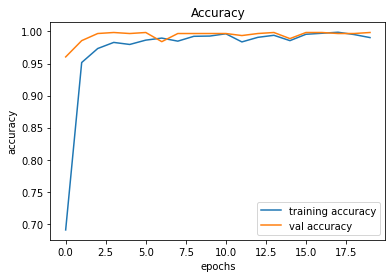

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

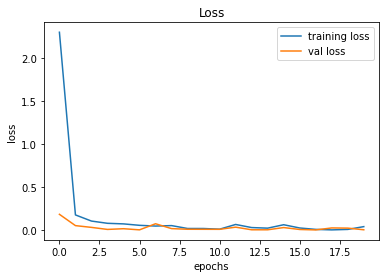

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Let's do testing on Test data

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/archive/Test - Test.csv')

In [ ]:
Y_pred = model.predict_classes(X_test)
Y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  1,  7, 10])

## Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9491686460807601


## Save the model

In [ ]:
model.save("/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/NhaModelVRA.h5")

## Load the Model

In [ ]:
import os
os.chdir(r'/content/drive/My Drive/VRA-CS2225.CH1801.N014/')
from keras.models import load_model
model = load_model('/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/NhaModelVRA.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Biển báo giới hạn tốc độ (20km/h)',
            1:'Biển báo dừng', 
            2:'Biển báo hiệu đèn xanh đèn đỏ', 
            3:'Biển báo lệnh đi thẳng', 
            4:'Biển báo vòng xoay', 
            5:'Biển báo cấm xe tải vượt',  }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Kết quả:  Biển báo hiệu đèn xanh đèn đỏ


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


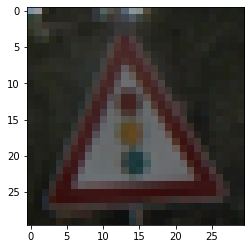

In [ ]:
plot,prediction = test_on_img(r'/content/drive/My Drive/VRA-CS2225.CH1801.N014/vra/test/01695.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Kết quả: ", classes[a])
plt.imshow(plot)
plt.show()